In [1]:
import matplotlib.pyplot as plt
import res_equa_diff as red
import numpy as np
import importlib

# Homogen univers

Declaring all constants

In [2]:
A0 = 1
H0 = 70e3/30.856e21
OMEGA_M0 = 0.3
OMEGA_L0 = 0.7
OMEGA_R0 = 4.6e-5
OMEGA_K0 = 0
GYEAR = 24*60*60*365*1e9
G = 6.67e-11


We will need the second equation of Friedmann for calculate the scale factor $a$:

$$H = \frac{\dot{a}}{a} = H_0 \sqrt{\Omega_{R0}a^{-4} + \Omega_{m0}a^{-3} + \Omega_{k0}a^{-2}+ \Omega_{\Lambda 0}}$$

This differential equation can allow me to calculate the scale factor with the modern cosmology constants, but not all the model because of the square root.
For solving this, I drift through time:

$$\ddot{a} = H_0^2(\Omega_{\Lambda 0}a - \Omega_{m 0}a^{-2} - \Omega_{r 0}a^{-3})$$

No more square root here.

Function $\frac{da}{dt}$, $\frac{d^2 a}{dt^2}$

In [3]:
def a_p(a,OMEGA_R0=OMEGA_R0, OMEGA_M0=OMEGA_M0,OMEGA_L0=OMEGA_L0, OMEGA_K0=OMEGA_K0):

    return a*H0*np.sqrt(OMEGA_R0*a**-4 + OMEGA_M0*a**-3 + OMEGA_L0 + OMEGA_K0*a**-2)

def a_pp(a,OMEGA_R0=OMEGA_R0, OMEGA_M0=OMEGA_M0,OMEGA_L0=OMEGA_L0, OMEGA_K0=OMEGA_K0):

    return H0**2*(OMEGA_L0*a-OMEGA_M0/2*a**-2-OMEGA_R0*a**-3)



I solve second equation of Friedmann and test for different cosmology models

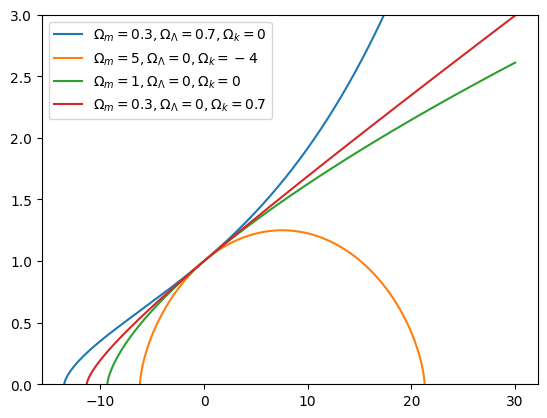

In [4]:
importlib.reload(red)

plt.figure()

a_left,t_left = red.cosmo_model(-GYEAR*1e-3,a_p,a_pp,1, 15*GYEAR)
a_right, t_right = red.cosmo_model(GYEAR*1e-3,a_p,a_pp,1, 30*GYEAR)

a = np.concatenate([a_left[::-1], a_right],)
t = np.concatenate([t_left[::-1], t_right],)

plt.plot(np.array(t)/(GYEAR),a, label = r"$\Omega_{m} = 0.3, \Omega_{\Lambda} = 0.7, \Omega_{k} = 0 $")


a_left,t_left = red.cosmo_model(-GYEAR*1e-3,a_p,a_pp,1, 15*GYEAR, OMEGA_R0=0, OMEGA_M0=5,OMEGA_L0=0, OMEGA_K0=-4)
a_right, t_right = red.cosmo_model(GYEAR*1e-3,a_p,a_pp,1, 30*GYEAR, OMEGA_R0=0, OMEGA_M0=5,OMEGA_L0=0, OMEGA_K0=-4)

a = np.concatenate([a_left[::-1], a_right],)
t = np.concatenate([t_left[::-1], t_right],)

plt.plot(np.array(t)/(GYEAR),a, label = r"$\Omega_{m} = 5, \Omega_{\Lambda} = 0, \Omega_{k} = -4 $")

a_left,t_left = red.cosmo_model(-GYEAR*1e-3,a_p,a_pp,1, 15*GYEAR, OMEGA_R0=0, OMEGA_M0=1,OMEGA_L0=0, OMEGA_K0=0)
a_right, t_right = red.cosmo_model(GYEAR*1e-3,a_p,a_pp,1, 30*GYEAR, OMEGA_R0=0, OMEGA_M0=1,OMEGA_L0=0, OMEGA_K0=0)

a = np.concatenate([a_left[::-1], a_right],)
t = np.concatenate([t_left[::-1], t_right],)

plt.plot(np.array(t)/(GYEAR),a, label = r"$\Omega_{m} = 1, \Omega_{\Lambda} = 0, \Omega_{k} = 0 $")


a_left,t_left = red.cosmo_model(-GYEAR*1e-3,a_p,a_pp,1, 15*GYEAR, OMEGA_R0=0, OMEGA_M0=0.3,OMEGA_L0=0, OMEGA_K0=0.7)
a_right, t_right = red.cosmo_model(GYEAR*1e-3,a_p,a_pp,1, 30*GYEAR, OMEGA_R0=0, OMEGA_M0=0.3,OMEGA_L0=0, OMEGA_K0=0.7)

a = np.concatenate([a_left[::-1], a_right],)
t = np.concatenate([t_left[::-1], t_right],)

plt.plot(np.array(t)/(GYEAR),a, label = r"$\Omega_{m} = 0.3, \Omega_{\Lambda} = 0, \Omega_{k} = 0.7 $")


plt.ylim(0,3)
plt.legend()
plt.show()


Resolution of differential equation by using first order differential equation + Calculate all cosmology constants 

In [5]:
a, a_P, T = red.RK4(100000, 30*GYEAR, a_p, 1e-5)

H = a_P/a

rho_c = 3*H/(8*np.pi*G)

omega_m = OMEGA_M0*a**-3

omega_l = OMEGA_L0*np.ones(len(H))

omega_r = OMEGA_R0*a**-4

C:\Users\Xavier Corap\AppData\Local\Temp\ipykernel_13744\65607569.py:15: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax[1].set_xlim(0,2)


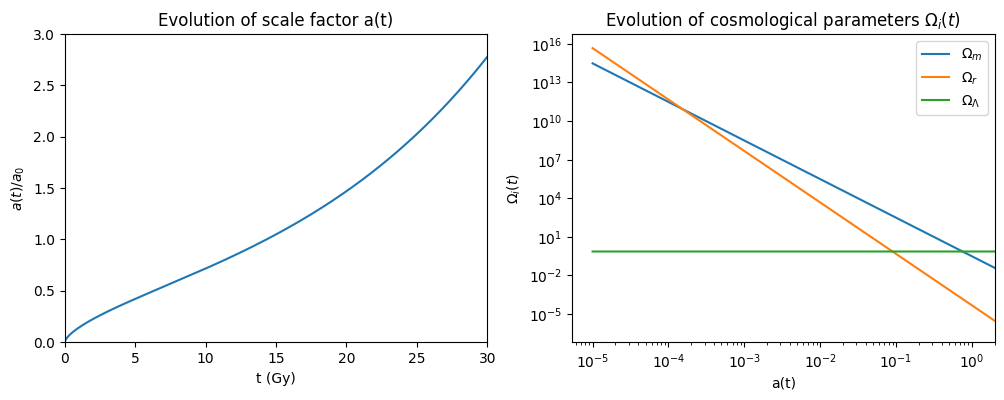

In [6]:

fig, ax = plt.subplots(1,2, figsize = (12,4))

ax[0].plot(T/(GYEAR), a)
ax[0].set_title("Evolution of scale factor a(t)")
ax[0].set_ylabel(r"$a(t)/a_0$")
ax[0].set_xlabel("t (Gy)")
ax[0].set_xlim(0,30)
ax[0].set_ylim(0,3)
ax[1].loglog(a, omega_m, label = r"$\Omega_m$")
ax[1].loglog(a, omega_r, label = r"$\Omega_r$")
ax[1].loglog(a, omega_l, label = r"$\Omega_\Lambda$")
ax[1].set_title(r"Evolution of cosmological parameters $\Omega_i(t)$")
ax[1].set_ylabel(r"$\Omega_i(t)$")
ax[1].set_xlabel("a(t)")
ax[1].set_xlim(0,2)
ax[1].legend()
plt.show()

# Perturbations 


We resolve 4 equations :

$$\partial_t \delta_i + a^{-1}\theta_i = 0$$

$$\partial_t \theta_i + H\theta_i = -\frac{c_{s,i}^2}{a} \nabla^2\delta_i - a^{-1} \nabla^2\Phi $$

$$\nabla^2\Phi =  a^{2} 4\pi G \bar{\rho_m}\delta_m $$

With $\theta_i = \nabla.u_i$. 
i = {c,b} for baryonic matter and cold dark matter, we pass in fourier space => $\nabla = ik$

$$\partial_t \delta_i + a^{-1}\theta_i = 0$$

$$\partial_t \theta_i + H\theta_i = \frac{c_{s,i}^2}{a} k^2\delta_i + a^{-1} k^2\Phi $$

$$-k^2\Phi =  a^{2} 4\pi G \bar{\rho_m}\delta_m $$

For the cold dark matter, $c_{s,i} = 0$

$$ \partial^2_t \delta_c + 2H\partial_t \delta_c = 4\pi G \bar{\rho_m} (\delta_c + \delta_b) $$

$$ \partial^2_t \delta_b + 2H\partial_t \delta_b + c^2_{s,b}k^2\delta_b = 4\pi G \bar{\rho_m} (\delta_c + \delta_b)  $$


For cold dark matter :

In [7]:
def cold_DM(H,a,f_p0,f0, omega_m0, rho_c0):

    rho_m_average = 0.7*omega_m0*rho_c0
    return -2*H*f_p0 + 4*np.pi*G*rho_m_average*f0

def Tb(a):
    a1 = 1/119
    a2 = 1/115
    T_CMB0 = 2.726

    return T_CMB0/a*(1+(a/a1)/(1+(a2/a)**(3/2)))**-1

def baryonic(H,a,f_p0,f0, omega_m0, rho_c0):

    rho_m_average = omega_m0*rho_c0
    mu = 1.22
    KB = 1.38e-23
    MH = 1.67e-27
    
    if a<1e-3:
        cs = 3e8/np.sqrt(3)
    else:
        cs = np.sqrt(5/3*KB*Tb(a)/MH)

    return -2*H*f_p0 - cs**2*f0 + 4*np.pi*G*rho_m_average*f0

In [ ]:
delta_c = np.empty_like(T)
delta_c_p = np.empty_like(T)
delta_c_pp= np.empty_like(T)
DT = np.sum(abs(GYEAR))/(len(T)-1)
delta_c[0] = H0**2
delta_c_p[0] = 0

for i in range(len(T)-1):
    delta_c[i+1] = delta_c[i] + DT*delta_c_p[i]

    delta_c_p[i+1] = delta_c_p[i] + DT*cold_DM(H[i],a[i],delta_c_p[i], delta_c[i], omega_m[i], rho_c[i])
    
    delta_c_pp[i+1] =  cold_DM(H[i+1],a[i+1],delta_c_p[i+1], delta_c[i+1], omega_m[i+1], rho_c[i+1])

    

C:\Users\Xavier Corap\AppData\Local\Temp\ipykernel_13744\1094722500.py:8: RuntimeWarning: overflow encountered in scalar multiply
  delta_c[i+1] = delta_c[i] + DT*delta_c_p[i]
C:\Users\Xavier Corap\AppData\Local\Temp\ipykernel_13744\3405551384.py:4: RuntimeWarning: invalid value encountered in scalar add
  return -2*H*f_p0 + 4*np.pi*G*rho_m_average*f0


In [9]:
importlib.reload(red)
#delta_c, delta_c_p, delta_c_pp, T = red.euler_order_2(100000, 13.6e9*YEAR, cold_DM, 1e-5, 1e-5, H, a, omega_m, rho_c)

<module 'res_equa_diff' from "c:\\Users\\Xavier Corap\\Documents\\On s'amuse\\Projet fuctuation densité univers\\res_equa_diff.py">

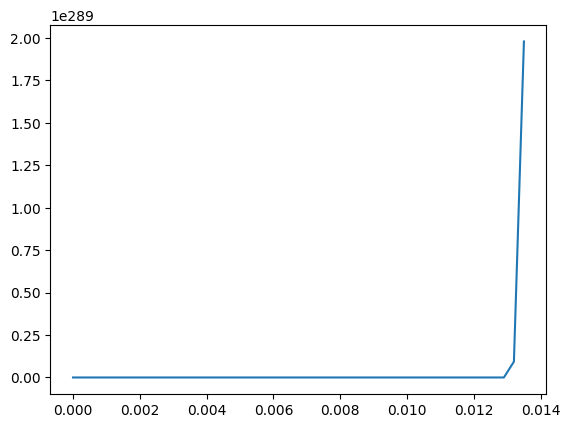

In [10]:
plt.plot(T/(GYEAR), delta_c_pp)
